<a href="https://colab.research.google.com/github/prasanna-emperor/xyz.seasonal/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST


In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 21624159.17it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 605620.94it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4832171.90it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3818506.47it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


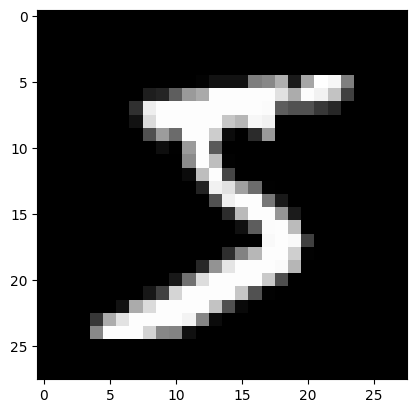

In [8]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


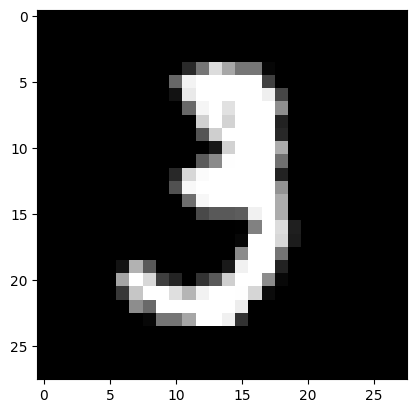

In [9]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

It's evident that these images are relatively small in size, and recognizing the digits can sometimes be challenging even for the human eye. While it's useful to look at these images, there's just one problem here: PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

In [10]:
import torchvision.transforms as transforms

In [11]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The image is now converted to a 1x28x28 tensor. The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB).

Let's look at some sample values inside the tensor.

In [14]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


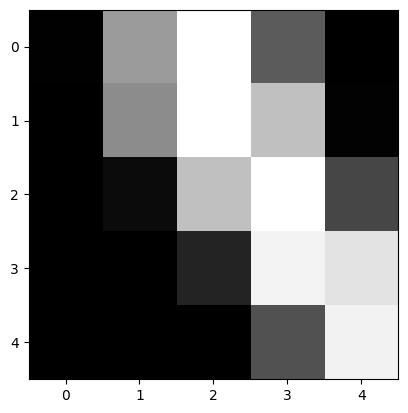

In [16]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

**Training and Validation Datasets**
While building real-world machine learning models, it is quite common to split the dataset into three parts:

Training set - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
Validation set - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
Test set - used to compare different models or approaches and report the model's final accuracy.
In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images.

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the random_spilt method from PyTorch.**bold text**

In [17]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [22]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [25]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0006, -0.0318,  0.0325,  ...,  0.0085, -0.0087,  0.0333],
        [-0.0094, -0.0013,  0.0165,  ...,  0.0342, -0.0310, -0.0222],
        [ 0.0189,  0.0356,  0.0321,  ...,  0.0064,  0.0050, -0.0190],
        ...,
        [ 0.0260, -0.0252,  0.0137,  ..., -0.0048,  0.0124, -0.0058],
        [ 0.0038,  0.0161,  0.0187,  ..., -0.0108, -0.0238, -0.0120],
        [-0.0256,  0.0302,  0.0318,  ..., -0.0169, -0.0320, -0.0335]],
       requires_grad=True)

In [26]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0329, -0.0037,  0.0338, -0.0028,  0.0233, -0.0353, -0.0245, -0.0276,
        -0.0020,  0.0141], requires_grad=True)

In [27]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([7, 0, 6, 3, 2, 2, 4, 2, 2, 4, 6, 8, 9, 4, 7, 9, 4, 2, 4, 5, 8, 0, 0, 0,
        5, 2, 3, 2, 2, 6, 5, 3, 1, 4, 0, 7, 8, 6, 7, 8, 2, 5, 4, 1, 7, 0, 7, 0,
        5, 0, 9, 3, 8, 8, 1, 2, 2, 5, 3, 2, 9, 9, 8, 4, 5, 1, 0, 3, 4, 7, 9, 9,
        0, 1, 4, 5, 2, 9, 5, 0, 9, 3, 2, 3, 6, 7, 1, 6, 8, 3, 1, 5, 2, 3, 1, 0,
        5, 5, 5, 8, 3, 7, 1, 0, 7, 1, 3, 4, 9, 8, 4, 8, 9, 2, 9, 3, 0, 4, 5, 1,
        9, 8, 2, 8, 5, 4, 0, 0])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [28]:
images.reshape(-1, 784).shape

torch.Size([128, 784])

The code above leads to an error because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the .reshape method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. To include this additional functionality within our model, we need to define a custom model by extending the nn.Module class from PyTorch.

A class in Python provides a "blueprint" for creating objects. Let's look at an example of defining a new class in Python.:

In [30]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

inside the __init__ constructor method, we instantiate the weights and biases using nn.Linear. And inside the forward method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into self.linear.

xb.reshape(-1, 28*28) indicates to PyTorch that we want a view of the xb tensor with two dimensions. The length along the 2nd dimension is 28*28 (i.e., 784). One argument to .reshape can be set to -1 (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has .weight and .bias attributes (as they are now inside the .linear attribute), but it does have a .parameters method that returns a list containing the weights and bias.

In [31]:
model.linear
#Linear(in_features=784, out_features=10, bias=True)
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0166, -0.0105,  0.0184,  ..., -0.0312,  0.0127, -0.0187],
         [ 0.0041,  0.0037, -0.0255,  ..., -0.0300,  0.0252, -0.0315],
         [-0.0094, -0.0010,  0.0261,  ...,  0.0261,  0.0244, -0.0004],
         ...,
         [-0.0289, -0.0302, -0.0300,  ...,  0.0268,  0.0302,  0.0185],
         [ 0.0180,  0.0193,  0.0279,  ..., -0.0231, -0.0282,  0.0310],
         [ 0.0143,  0.0036, -0.0121,  ..., -0.0185, -0.0267,  0.0102]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0073,  0.0127, -0.0270,  0.0164,  0.0173, -0.0254, -0.0268,  0.0219,
          0.0221, -0.0189], requires_grad=True)]

In [33]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0746, -0.0882, -0.1258, -0.3320,  0.1120, -0.3199, -0.0172, -0.3091,
         -0.1114,  0.3741],
        [-0.1541,  0.0851,  0.0522,  0.0958,  0.0735, -0.1487, -0.0525, -0.1109,
         -0.3008,  0.5506]])


In [35]:
import torch.nn.functional as F

In [36]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1134, 0.0963, 0.0928, 0.0755, 0.1177, 0.0764, 0.1034, 0.0773, 0.0941,
         0.1530],
        [0.0828, 0.1051, 0.1017, 0.1063, 0.1039, 0.0832, 0.0916, 0.0864, 0.0715,
         0.1675]])
Sum:  1.0


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using torch.max, which returns each row's largest element and the corresponding index.

In [37]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 9, 0, 6, 4, 9, 1, 7, 0, 5, 9, 9, 0, 1, 0, 1, 7, 0, 0, 0, 9, 1, 9, 5,
        0, 9, 9, 9, 0, 9, 0, 1, 0, 0, 8, 9, 9, 1, 5, 8, 0, 5, 0, 4, 9, 0, 9, 1,
        9, 9, 0, 0, 6, 7, 3, 9, 4, 1, 9, 4, 0, 9, 5, 4, 4, 5, 0, 6, 0, 9, 0, 7,
        9, 1, 9, 6, 1, 1, 9, 7, 7, 9, 9, 9, 9, 0, 9, 9, 0, 9, 9, 9, 9, 0, 3, 8,
        1, 0, 7, 4, 3, 0, 7, 9, 9, 3, 9, 9, 9, 1, 9, 1, 0, 1, 4, 3, 4, 9, 3, 0,
        1, 0, 9, 9, 4, 9, 1, 1])
tensor([0.1530, 0.1675, 0.1465, 0.1169, 0.1178, 0.1204, 0.1219, 0.1301, 0.1380,
        0.1155, 0.1192, 0.1241, 0.1273, 0.1239, 0.1301, 0.1216, 0.1158, 0.1315,
        0.1366, 0.1561, 0.1526, 0.1215, 0.1230, 0.1142, 0.1202, 0.1165, 0.1748,
        0.1680, 0.1323, 0.1315, 0.1205, 0.1099, 0.1420, 0.1164, 0.1274, 0.1388,
        0.1786, 0.1189, 0.1157, 0.1121, 0.1220, 0.1370, 0.1261, 0.1261, 0.1791,
        0.1295, 0.1462, 0.1311, 0.1161, 0.1230, 0.1239, 0.1329, 0.1197, 0.1115,
        0.1294, 0.1693, 0.1112, 0.1150, 0.1399, 0.1326, 0.1319, 0.1613, 0.1253,
       

In [38]:
labels

tensor([0, 6, 5, 1, 3, 2, 3, 2, 1, 9, 4, 5, 3, 1, 3, 3, 4, 5, 3, 2, 0, 5, 9, 9,
        8, 4, 2, 6, 1, 4, 9, 1, 5, 5, 3, 9, 6, 8, 3, 2, 5, 2, 6, 8, 0, 1, 8, 1,
        0, 7, 1, 1, 3, 8, 7, 6, 9, 4, 9, 7, 5, 5, 7, 0, 4, 3, 4, 2, 8, 9, 5, 8,
        6, 7, 0, 6, 1, 1, 3, 7, 0, 0, 5, 6, 6, 1, 6, 9, 9, 4, 4, 4, 4, 8, 3, 2,
        7, 4, 4, 5, 8, 1, 2, 4, 8, 7, 7, 4, 9, 5, 6, 7, 7, 3, 8, 8, 0, 0, 3, 6,
        7, 2, 6, 8, 7, 4, 1, 9])

In [39]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [40]:
accuracy(outputs,labels)

tensor(0.1328)

In [41]:
loss_fn = F.cross_entropy
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3207, grad_fn=<NllLossBackward0>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. 2.23 is look at e^-2.23 which is around 0.1 as the predicted probability of the correct label, on average. The lower the loss, The better the model.

Training the model
Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem.

We'll include the problem-independent parts within a function called fit, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the nn.Module class.